# housekeeping

In [1]:
! pwd

/Users/domolm/Library/CloudStorage/GoogleDrive-domokomod5@gmail.com/My Drive/Learning/rakus/CI coding practice/Python


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.rcParams['font.family'] = "YuGothic"

# 3.8

## 表3.3

In [3]:
data03 = pd.read_csv('../causality-main/data03.csv')
data03

,x1,y3,t1,y0t,y1t
0,70,74,1,62,74
1,70,63,0,63,74
2,70,73,1,62,73
3,70,71,1,65,71
4,70,74,1,63,74
5,75,67,0,67,77
6,75,77,1,68,77
7,75,68,0,68,76
8,75,77,1,68,77
9,75,78,1,67,78


In [4]:
# 数値要約
# dplyr::count(data03, t1, sort=TRUE)
data03.t1.value_counts(sort=False)

1    10
0    10
Name: t1, dtype: int64

In [5]:
# R: summary(df)
data03.describe()

,x1,y3,t1,y0t,y1t
count,20.000000,20.00000,20.000000,20.00000,20.000000
mean,80.000000,77.25000,0.500000,72.20000,82.000000
std,8.111071,7.02533,0.512989,7.56446,7.490345
min,70.000000,63.00000,0.000000,62.00000,71.000000
25%,73.750000,73.75000,0.000000,66.50000,75.500000
50%,80.000000,77.00000,0.500000,71.00000,81.500000
75%,86.250000,82.00000,1.000000,78.75000,88.750000
max,90.000000,91.00000,1.000000,82.00000,92.000000


In [6]:
# R: str(df)
data03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      20 non-null     int64
 1   y3      20 non-null     int64
 2   t1      20 non-null     int64
 3   y0t     20 non-null     int64
 4   y1t     20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


In [7]:
# R: colSums(is.na(df))
data03.isnull().sum()

x1     0
y3     0
t1     0
y0t    0
y1t    0
dtype: int64

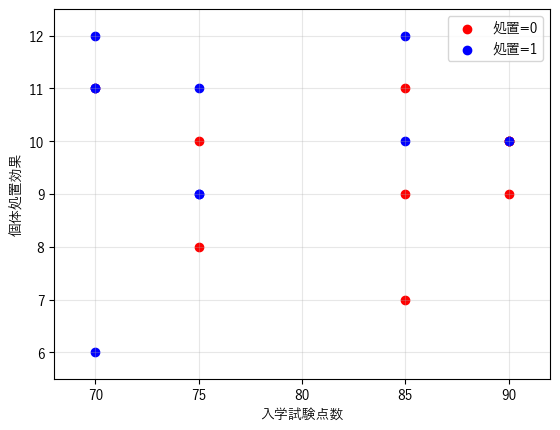

In [8]:
datas = [
    data03[data03.t1==0].reset_index(drop=True), 
    data03[data03.t1==1].reset_index(drop=True)
    ]
color = ['red', 'blue']
labels = ['処置=0', '処置=1']


fig, ax = plt.subplots()

for data, color, label in zip(datas, color, labels):
    ax.scatter(
        x=data['x1'], y=(data.y1t - data.y0t), c=color, label=label
        )
    
plt.xlabel('入学試験点数')
plt.ylabel('個体処置効果')
plt.xlim([68, 92])
plt.ylim([5.5, 12.5])
plt.grid(alpha=0.3)
plt.legend(facecolor='white')

In [9]:
data03[data03['t1']==0]['y3']

1     63
5     67
7     68
11    77
12    76
14    78
15    81
17    82
18    82
19    82
Name: y3, dtype: int64

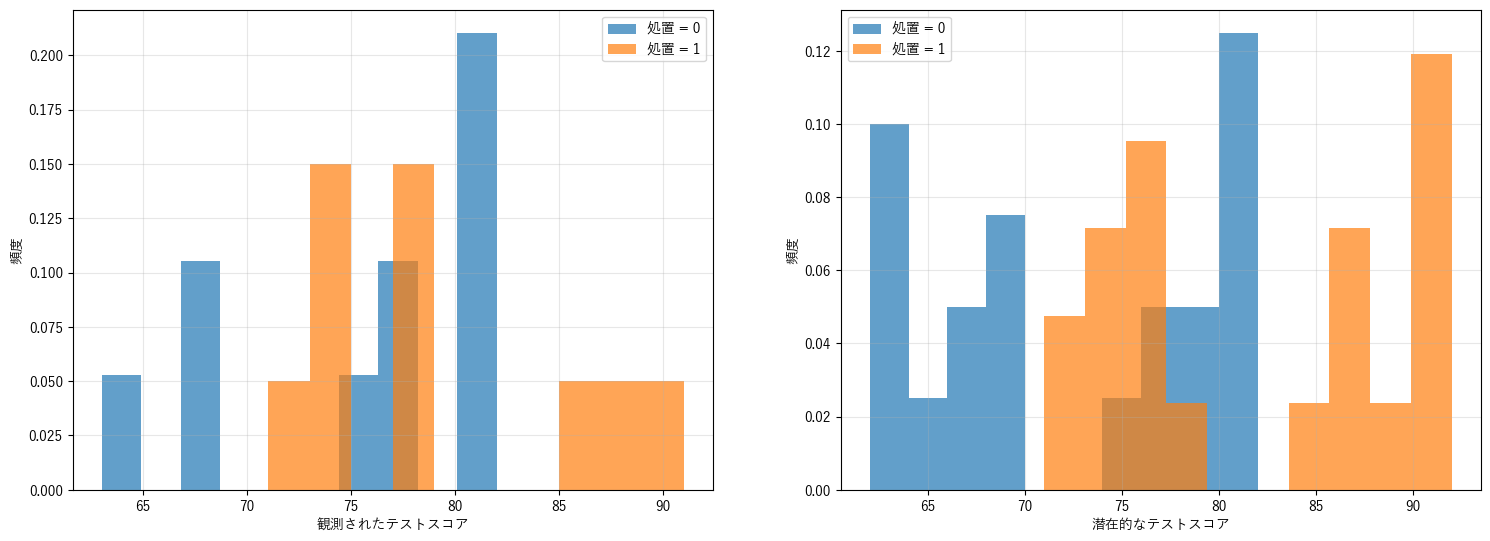

In [10]:
fig = plt.figure()

ax1 = fig.add_axes([0,0,1,1])
ax1.hist(
    data03[data03['t1']==0]['y3'], density=True, 
    alpha=0.7, label='処置 = 0'
    )
ax1.hist(
    data03[data03['t1']==1]['y3'], density=True, 
    alpha=0.7, label='処置 = 1'
    )
ax1.set_xlabel('観測されたテストスコア')
ax1.set_ylabel('頻度')
ax1.legend()
ax1.grid(alpha=0.3)


ax2 = fig.add_axes([1.2, 0, 1, 1])
ax2.hist(
    data03['y0t'], density=True,
    alpha=0.7, label='処置 = 0'
)
ax2.hist(
    data03['y1t'], density=True,
    alpha=0.7, label='処置 = 1'
)
ax2.set_xlabel('潜在的なテストスコア')
ax2.set_ylabel('頻度')
ax2.legend()
ax2.grid(alpha=0.3)

## 表3.4

In [11]:
np.mean(data03.loc[data03['t1']==1, 'y3']) \
    - np.mean(data03.loc[data03['t1']==0, 'y3'])

3.3000000000000114

In [12]:
np.mean(data03.y1t) - np.mean(data03.y0t)

9.799999999999997

# 3.9

## 図3.4

(60.0, 100.0)

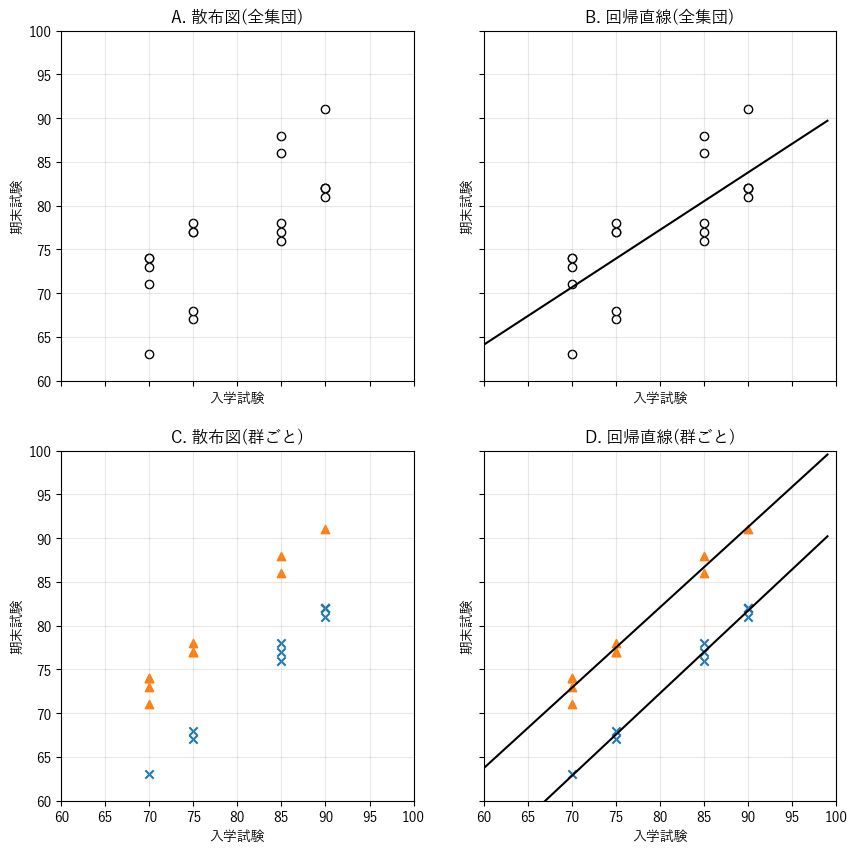

In [18]:
fig, ax = plt.subplots(
    figsize=(10,10), ncols=2, nrows=2,
    sharex=True, sharey=True
    )


ax[0,0].scatter(
    x=data03['x1'], y=data03['y3'], marker='o', 
    facecolor='white', edgecolors='black'
    )
ax[0,0].set_title('A. 散布図(全集団)')


ax[0,1].scatter(
    data03.x1, data03.y3, marker='o', 
    facecolor='white', edgecolors='black'
    )
coef = np.polyfit(data03.x1, data03.y3, 1)
poly1d_fn = np.poly1d(coef)
ax[0,1].plot(
    np.arange(60, 100), poly1d_fn(np.arange(60, 100)),
    color='black'
    )
ax[0,1].set_title('B. 回帰直線(全集団)')



marker = ['x', '^']
ts = [0, 1]
for m, t in zip(marker, ts):
    data_t = data03.loc[data03.t1==t].copy()
    ax[1,0].scatter(
        data_t['x1'], data_t['y3'], marker=m
    )
ax[1,0].set_title('C. 散布図(群ごと)')


for m, t in zip(marker, ts):
    data_t = data03.loc[data03.t1==t].copy()
    ax[1,1].scatter(
        data_t['x1'], data_t['y3'], marker=m
    )

    coef = np.polyfit(data_t['x1'], data_t['y3'], 1)
    poly1d_fn = np.poly1d(coef)
    ax[1,1].plot(
        np.arange(60, 100), poly1d_fn(np.arange(60, 100)),
        color='black'
        )
ax[1,1].set_title('D. 回帰直線(群ごと)')


for i, j in zip(np.array([0,0,1,1]), np.array([0,1,0,1])):
    ax[i,j].set_xlabel('入学試験')
    ax[i,j].set_ylabel('期末試験')
    ax[i,j].grid(alpha=0.3)
plt.xlim(60, 100)
plt.ylim(60, 100)


## 表 3.5

In [14]:
X = np.c_[data03.x1, data03.t1]
X = sm.add_constant(X)
y = data03.y3

model1 = sm.OLS(y, X)
res = model1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     629.5
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.15e-16
Time:                        11:56:06   Log-Likelihood:                -23.674
No. Observations:                  20   AIC:                             53.35
Df Residuals:                      17   BIC:                             56.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1256      2.274     -0.935      0.3